In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
S04_path = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/process_data/S04_final_df.csv'

S04_df = pd.read_csv(S04_path, index_col=False, parse_dates=['DateTime'])

# Set 'DateTime' column as the index
S04_df.set_index('DateTime', inplace=True)

# Display the DataFrame
print(S04_df)

                    ID_instance     hrv_vlf       hrv_lf      hrv_hf  \
DateTime                                                               
2023-07-18 16:43:11       S04_1  551.680587  1704.800811  450.329881   
2023-07-18 16:43:12       S04_1  599.211589  1833.574563  300.888787   
2023-07-18 16:43:13       S04_1  633.576854  1796.333770  318.755009   
2023-07-18 16:43:14       S04_1  678.888834  1777.002762  339.781666   
2023-07-18 16:43:15       S04_1  678.888834  1777.002762  339.781666   
...                         ...         ...          ...         ...   
2023-07-31 11:49:50       S04_5   76.384147   195.824500  226.749835   
2023-07-31 11:49:51       S04_5   76.384147   195.824500  226.749835   
2023-07-31 11:49:52       S04_5   76.384147   195.824500  226.749835   
2023-07-31 11:49:53       S04_5   76.384147   195.824500  226.749835   
2023-07-31 11:49:54       S04_5   76.384147   195.824500  226.749835   

                      hrv_sdnn  hrv_rmssd  hrv_mean_nni  hrv_me

In [3]:
# Group by 'id_instance' and calculate time duration
time_duration = S04_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S04_1     5.17
S04_2    30.28
S04_3    10.47
S04_4    11.32
S04_5    12.37
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_15560\1514817910.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S04_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [4]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S04_df.drop(S04_df[S04_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [5]:
S04_df.isnull().sum()

ID_instance          4
hrv_vlf              0
hrv_lf               0
hrv_hf               0
hrv_sdnn             0
hrv_rmssd            0
hrv_mean_nni         0
hrv_median_nni       0
hrv_range_nni        0
hrv_entropy          0
eda_tonic_mean       0
eda_tonic_std        0
eda_tonic_sum        0
eda_tonic_energy     0
eda_phasic_mean      0
eda_phasic_std       0
eda_phasic_sum       0
eda_phasic_energy    0
acc_acc_x_min        0
acc_acc_y_min        0
acc_acc_z_min        0
acc_l2_min           0
acc_acc_x_max        0
acc_acc_y_max        0
acc_acc_z_max        0
acc_l2_max           0
acc_acc_x_ptp        0
acc_acc_y_ptp        0
acc_acc_z_ptp        0
acc_l2_ptp           0
Temp(C)_N1           0
RH(%)_N1             0
Dewpoint(C)_N1       0
Temp(C)_N2           0
RH(%)_N2             0
Dewpoint(C)_N2       0
Temp(C)_N3           0
RH(%)_N3             0
Dewpoint(C)_N3       0
Temp(C)_N4           0
RH(%)_N4             0
Dewpoint(C)_N4       0
Temp(C)_N5           0
RH(%)_N5   

In [6]:
S04_df.dropna(subset=['ID_instance'], inplace=True)

In [7]:
S04_df['ID_instance'].unique()

array(['S04_1', 'S04_2', 'S04_3', 'S04_4', 'S04_5'], dtype=object)

In [11]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S04_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S04_df.columns[30:42] 

# Calculating correlation matrix
correlation_matrix = S04_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.223259,0.396399,0.115005,0.226875,0.394288,0.126668,0.223870,0.395563,0.114710,0.184182,0.413945,0.112303
hrv_lf,0.163613,0.339502,0.049817,0.167855,0.331299,0.052690,0.164838,0.340699,0.047969,0.123589,0.352693,0.035195
hrv_hf,0.023170,0.049349,-0.031195,0.027914,0.037679,-0.020513,0.022625,0.035843,-0.043351,-0.018801,0.116563,-0.017911
hrv_sdnn,0.255675,0.338230,0.169184,0.259383,0.335180,0.180426,0.256088,0.333964,0.166533,0.214571,0.364533,0.171678
hrv_rmssd,-0.147112,-0.257014,-0.187747,-0.141856,-0.283206,-0.176036,-0.147191,-0.272279,-0.191567,-0.188636,-0.156394,-0.164449
hrv_mean_nni,-0.143969,0.034508,-0.106951,-0.145301,-0.027405,-0.140478,-0.147988,-0.008855,-0.135622,-0.177587,0.156111,-0.044471
hrv_median_nni,-0.160049,0.484460,-0.058530,-0.169019,0.438803,-0.098303,-0.165084,0.441871,-0.093258,-0.170745,0.534638,0.004082
hrv_range_nni,0.075737,0.095215,-0.020950,0.081540,0.083518,-0.011515,0.077585,0.094298,-0.021821,0.036366,0.118049,-0.036451
hrv_entropy,-0.527658,-0.287270,-0.452182,-0.531784,-0.296333,-0.468582,-0.528560,-0.293401,-0.464868,-0.500167,-0.307050,-0.453127
eda_tonic_mean,0.280983,-0.494292,0.264711,0.285895,-0.463683,0.282761,0.281878,-0.478966,0.293501,0.293180,-0.527951,0.261335


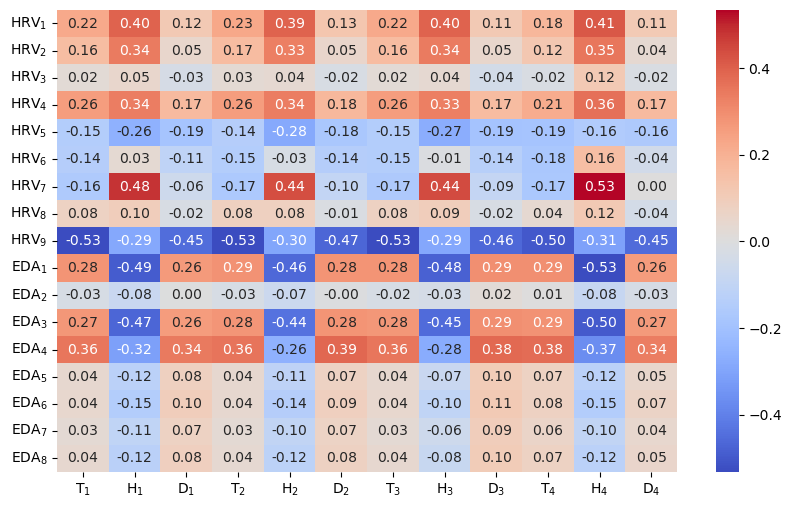

In [13]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S04')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/viz/'
plt.savefig(outpath+'S04_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S04_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


In [14]:
# Drop columns starting with 'acc_'
data = S04_df.filter(regex='^(?!acc_)')

In [10]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = data[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: data[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: data[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [data['Temp(C)_N1'].quantile(0.30), data['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [data['RH(%)_N1'].quantile(0.30), data['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return -1  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
data['lambda'] = data.apply(comfort_label, axis=1)
label_counts = data['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)


Variables considered for the comfort function:
HRV Variable: hrv_entropy
EDA Variable: eda_tonic_mean
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
 0    51.231763
-1    45.969864
 1     2.798374
Name: proportion, dtype: float64
